# Problem Statement and Objective

A ride-sharing company wants to implement a dynamic pricing strategy to optimize fares based on real-time market conditions. The company only uses ride duration to decide ride fares currently. The company aims to leverage data-driven techniques to analyze historical data and develop a predictive model that can dynamically adjust prices in response to changing factors.

A dataset containing historical ride data has been provided. The dataset includes features such as the number of riders, number of drivers, location category, customer loyalty status, number of past rides, average ratings, time of booking, vehicle type, expected ride duration, and historical cost of the rides.

Your goal is to build a dynamic pricing model that incorporates the provided features to predict optimal fares for rides in real-time. The model must consider factors such as demand patterns and supply availability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dynamic_pricing.csv')

In [3]:
df

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [5]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [6]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [7]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [8]:
def plot_pie(values, labels):
    plt.pie(x=values, labels=labels, autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(values)):d})')
    plt.show()

## Visualizing the categorical variables

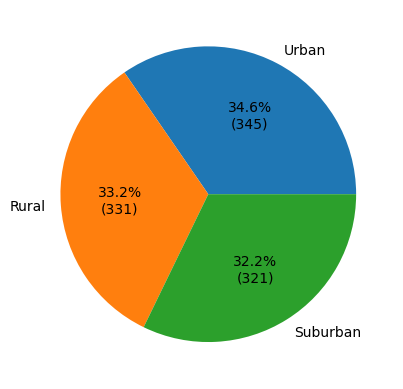

In [10]:
plot_pie(values=list(df['Location_Category'].value_counts()),
        labels = list(df['Location_Category'].value_counts().reset_index()['Location_Category']))

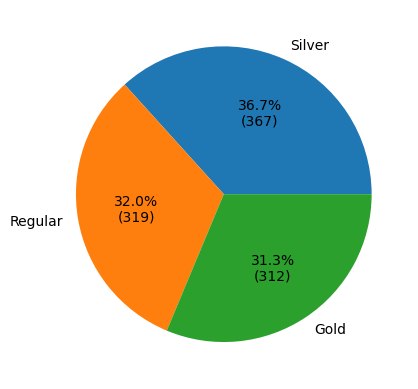

In [11]:
plot_pie(values = list(df['Customer_Loyalty_Status'].value_counts()), 
         labels=list(df['Customer_Loyalty_Status'].value_counts().reset_index()['Customer_Loyalty_Status']))

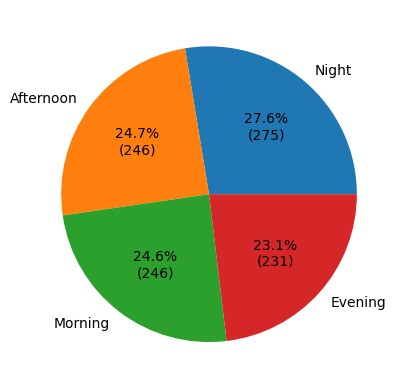

In [12]:
plot_pie(values = list(df['Time_of_Booking'].value_counts()), 
        labels = list(df['Time_of_Booking'].value_counts().reset_index()['Time_of_Booking']))

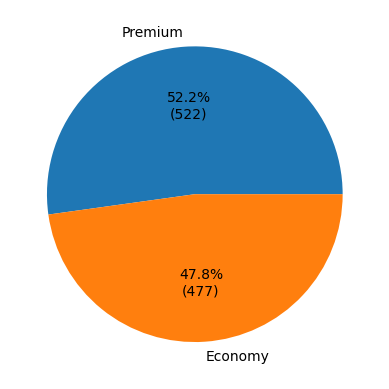

In [13]:
plot_pie(values = list(df['Vehicle_Type'].value_counts()),
        labels = list(df['Vehicle_Type'].value_counts().reset_index()['Vehicle_Type']))

## Visualizing the numerical variables

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [16]:
def plot_histogram(x):
    sns.histplot(x,kde=True)
    plt.show()

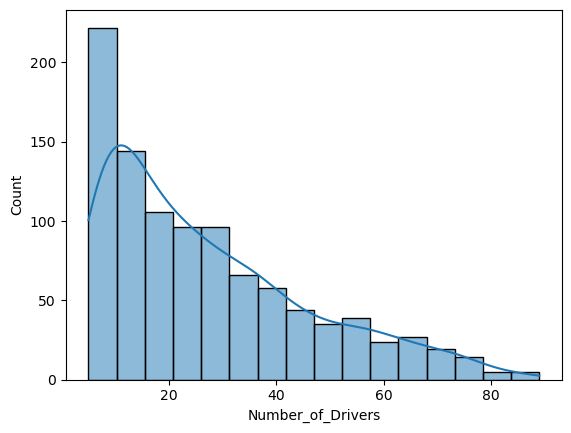

In [17]:
plot_histogram(df['Number_of_Drivers'])

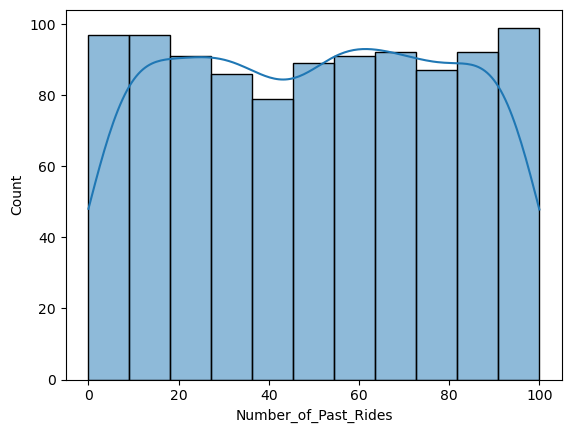

In [18]:
plot_histogram(df['Number_of_Past_Rides'])

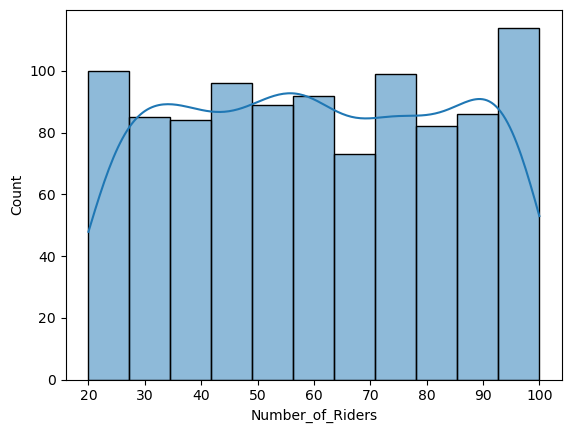

In [19]:
plot_histogram(df['Number_of_Riders'])

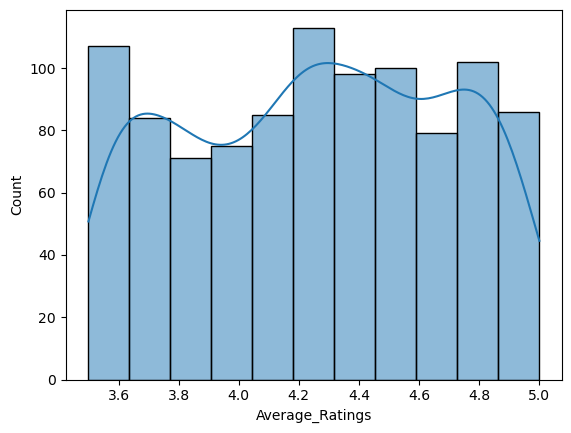

In [20]:
plot_histogram(df['Average_Ratings'])

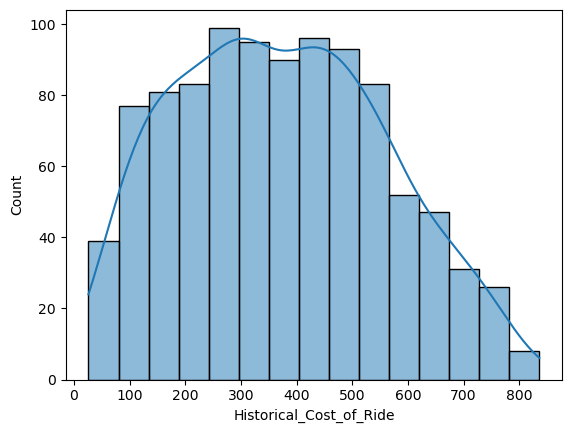

In [21]:
plot_histogram(df['Historical_Cost_of_Ride'])

## Creating the dummies for categorical variables

In [23]:
categorical_vars = list(df.select_dtypes('object').columns)

In [24]:
for col in categorical_vars:
    df = pd.concat([df, pd.get_dummies(df[col])], axis=1)
    df.drop(columns=[col], inplace=True)

In [25]:
df.astype('float64')

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride,Rural,Suburban,Urban,Gold,Regular,Silver,Afternoon,Evening,Morning,Night,Economy,Premium
0,90.0,45.0,13.0,4.47,90.0,284.257273,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,58.0,39.0,72.0,4.06,43.0,173.874753,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42.0,31.0,0.0,3.99,76.0,329.795469,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,89.0,28.0,67.0,4.31,134.0,470.201232,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,78.0,22.0,74.0,3.77,149.0,579.681422,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33.0,23.0,24.0,4.21,11.0,91.389526,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
996,84.0,29.0,92.0,4.55,94.0,424.155987,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,44.0,6.0,80.0,4.13,40.0,157.364830,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
998,53.0,27.0,78.0,3.63,58.0,279.095048,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Number_of_Past_Rides     1000 non-null   int64  
 3   Average_Ratings          1000 non-null   float64
 4   Expected_Ride_Duration   1000 non-null   int64  
 5   Historical_Cost_of_Ride  1000 non-null   float64
 6   Rural                    1000 non-null   bool   
 7   Suburban                 1000 non-null   bool   
 8   Urban                    1000 non-null   bool   
 9   Gold                     1000 non-null   bool   
 10  Regular                  1000 non-null   bool   
 11  Silver                   1000 non-null   bool   
 12  Afternoon                1000 non-null   bool   
 13  Evening                  1000 non-null   bool   
 14  Morning                  

## Seperating the Input features and Predictive column

In [32]:
y = df['Historical_Cost_of_Ride']
X = df.drop(columns=['Historical_Cost_of_Ride'])

In [34]:
X

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Rural,Suburban,Urban,Gold,Regular,Silver,Afternoon,Evening,Morning,Night,Economy,Premium
0,90,45,13,4.47,90,False,False,True,False,False,True,False,False,False,True,False,True
1,58,39,72,4.06,43,False,True,False,False,False,True,False,True,False,False,True,False
2,42,31,0,3.99,76,True,False,False,False,False,True,True,False,False,False,False,True
3,89,28,67,4.31,134,True,False,False,False,True,False,True,False,False,False,False,True
4,78,22,74,3.77,149,True,False,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33,23,24,4.21,11,False,False,True,True,False,False,False,False,True,False,False,True
996,84,29,92,4.55,94,False,False,True,False,True,False,False,False,True,False,False,True
997,44,6,80,4.13,40,False,True,False,True,False,False,False,False,False,True,False,True
998,53,27,78,3.63,58,False,True,False,False,True,False,False,False,False,True,False,True


In [36]:
y

0      284.257273
1      173.874753
2      329.795469
3      470.201232
4      579.681422
          ...    
995     91.389526
996    424.155987
997    157.364830
998    279.095048
999    655.065106
Name: Historical_Cost_of_Ride, Length: 1000, dtype: float64

## Train and Test Split

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [44]:
print('Train size: ',X_train.shape)
print('Test size: ', X_test.shape)

Train size:  (800, 17)
Test size:  (200, 17)


## Model1: Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()

In [51]:
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred =lr.predict(X_test)

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

print('R2_score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', root_mean_squared_error(y_test, y_pred))

R2_score:  0.8858951836281841
MAE:  50.923845232675795
RMSE:  65.1132809027666


## Model2: Decision Tree

In [77]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

In [79]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [85]:
y_pred = dt.predict(X_test)

In [87]:
print('R2_score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', root_mean_squared_error(y_test, y_pred))

R2_score:  0.7760691876167579
MAE:  66.74291765191393
RMSE:  91.21673405062718


## Model3: Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rf = RandomForestRegressor()

In [94]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [96]:
y_pred = rf.predict(X_test)

In [98]:
print('R2_score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', root_mean_squared_error(y_test, y_pred))

R2_score:  0.8716896817462629
MAE:  53.58135427474732
RMSE:  69.04756727257256


## Model4: lasso Regression

In [101]:
from sklearn.linear_model import Lasso, Ridge

In [103]:
lasso = Lasso()

In [105]:
lasso.fit(X_train, y_train)

Lasso()

In [109]:
y_pred = lasso.predict(X_test)

In [111]:
print('R2_score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', root_mean_squared_error(y_test, y_pred))

R2_score:  0.8859680131110294
MAE:  50.5304817760073
RMSE:  65.09249771560366


## Model5: Ridge Regression

In [135]:
ridge = Ridge()

In [137]:
ridge.fit(X_train, y_train)

Ridge()

In [141]:
y_pred = ridge.predict(X_test)

In [143]:
print('R2_score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', root_mean_squared_error(y_test, y_pred))

R2_score:  0.8859114915476286
MAE:  50.91961568467023
RMSE:  65.10862772458937


## Results

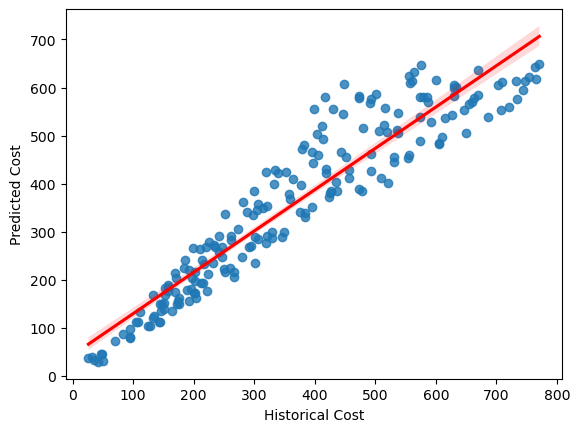

In [129]:
sns.regplot(x= y_test, y=y_pred, line_kws ={'color':'red'})
plt.xlabel('Historical Cost')
plt.ylabel('Predicted Cost')
plt.show()

### Equation of the Lienar regression model

In [167]:
print(f'Equation : y = {lr.coef_[0]:.2f}x + {lr.intercept_:.2f}')
print(f'R-sqaured :  {r2_score(y_test, y_pred):.2f}')

Equation : y = 0.01x + -12.60
R-sqaured :  0.89
